# Лабораторная №1
## Задание

Имеетсе выборка некоторой случайной величины ξ в виде интервального статистического ряда (табл.).

а) Построить гистограмму и график эмперической функции распределения F<sub>n</sub>(x)

б) Вычислить выборочные: среднее, дисперсию, медиану, коэффициент вариации, коэффициент асимметрии, эксцесс

в) Добавить искусственно к данным большую флуктуацию (порядка 1000). Как изменятся вычесленные параметры? Почему?

**Вариант 17:**

| **Интервал**   | (140;145)  | (145;150)  | (150;155)  | (155;160)  | (160;165)  |
|:--------------:|:----------:|:----------:|:----------:|:----------:|:----------:|
|  **Частота**   |     45     |     105    |    100     |     40     |     10     |

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
amounts = [45, 105, 100, 40, 10]
intervals = [(140,145), (145,150), (150,155), (155,160), (160,165)]

In [67]:
def intervals2str(intervals):
    return [str(interval) for interval in intervals]

In [68]:
step = intervals[0][1]-intervals[0][0]

In [71]:
total_amount = sum(amounts)
proportion_amounts = [amount/total_amount for amount in amounts]

<BarContainer object of 5 artists>

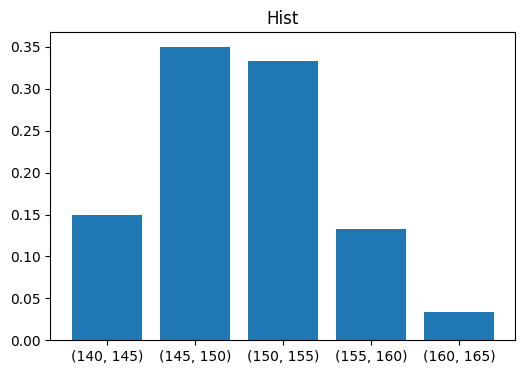

In [72]:
fig = plt.figure(figsize=(6,4))
plt.title('Hist')
plt.bar(intervals2str(intervals),proportion_amounts)

In [60]:
def average(intervals, amounts) -> float:
    N = sum(amounts)
    result = 0.0
    for i in range(len(amounts)):
        dz = (intervals[i][0]+intervals[i][1])/2
        result += dz * amounts[i] / N
    return result

In [64]:
values

[45, 105, 100, 40, 10]

In [63]:
average(intervals, values)

150.25

In [ ]:
def dispersion()